In [7]:
import pandas as pd 

In [8]:
accidents = pd.read_csv('/Volumes/UNTITLED/data proj DM/Accident_Information.csv')

/Users/macosx/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
accidents.head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No


In [10]:
#from pandas_profiling import ProfileReport
#prof=ProfileReport(accidents)
#prof.to_file(output_file ='report1.html')

In [11]:
accidents.isna().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

In [12]:
accidents = accidents.dropna()

In [13]:
accidents.head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,22:43,Urban,Fine no high winds,2005,No


In [14]:
print(accidents.shape)

(1129974, 34)


## Add Column Hours

In [15]:
accidents['Time'] = pd.to_datetime(accidents['Time'])

In [16]:
accidents['Hour'] =accidents['Time'].apply(lambda x: x.hour)

## Data Visualisation

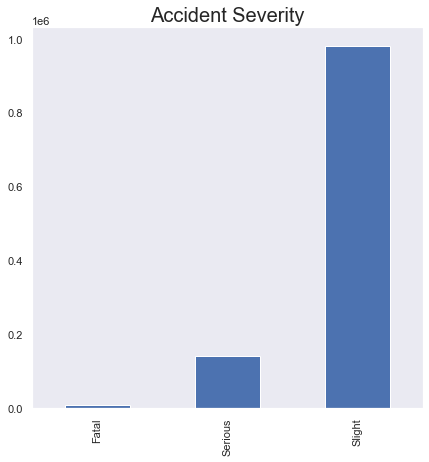

In [17]:
import matplotlib.pyplot as plt
ag = accidents.Accident_Severity.value_counts().sort_index()

plt.figure(figsize=(7,7))
ag.plot(kind='bar', subplots=True,figsize= (13,13))
plt.title('Accident Severity' , fontsize= 20)
plt.grid(False)

<AxesSubplot:>

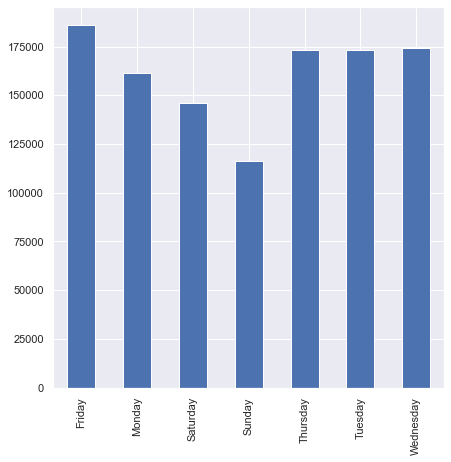

In [18]:
ag = accidents.Day_of_Week.value_counts().sort_index()
ag.plot(kind='bar',figsize= (7,7))

In [19]:
ag = accidents.groupby('Accident_Severity').Road_Type.value_counts().sort_index()
ag.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Accident_Severity,,,,,,
Fatal,1335,178,387,6469,87,26
Serious,13609,3238,11749,109590,1144,488
Slight,104622,21745,115651,721798,13012,4846


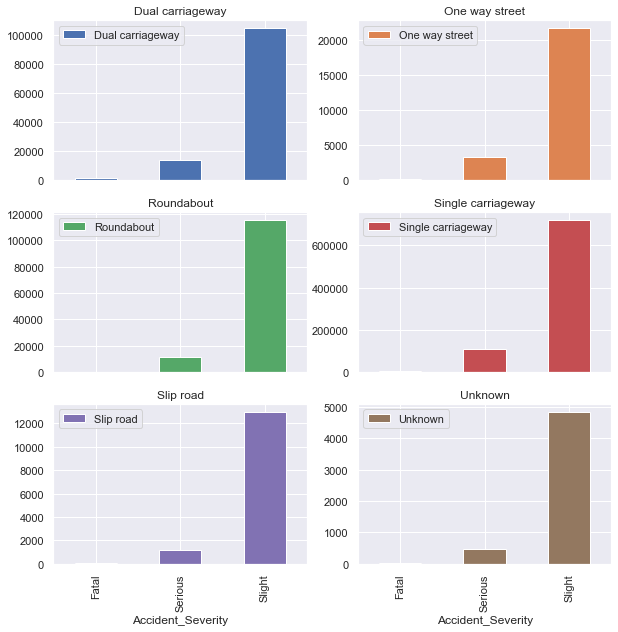

In [20]:
ag.unstack().plot(kind='bar', subplots=True, layout=(3,2),figsize= (10,10))
plt.show()

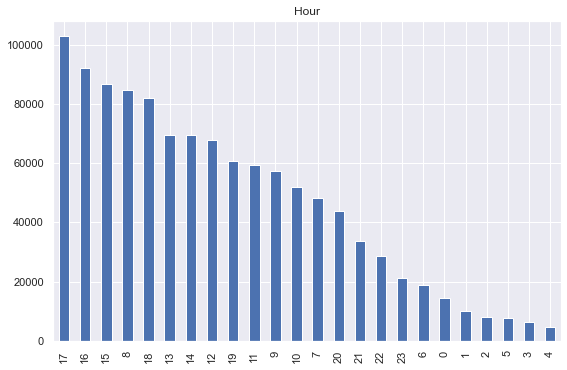

In [21]:
accidents['Hour'].value_counts().plot(kind='bar', subplots=True, layout=(3,2),figsize= (20,20))
plt.show()

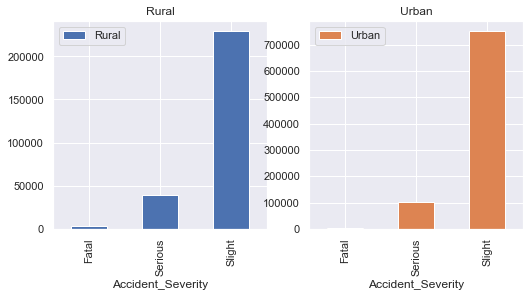

In [22]:

ag = accidents.groupby('Accident_Severity').Urban_or_Rural_Area.value_counts().sort_index()
# ag.unstack()
ag.unstack().plot(kind='bar', subplots=True, layout=(3,3),figsize= (13,13))
plt.show()

In [23]:
accidents["Light_Conditions"]=accidents["Light_Conditions"].replace('Daylight','light')
accidents["Light_Conditions"]=accidents["Light_Conditions"].replace('Darkness - lights lit','dark')
accidents["Light_Conditions"]=accidents["Light_Conditions"].replace('Darkness - lighting unknown','null')
accidents["Light_Conditions"]=accidents["Light_Conditions"].replace('Darkness - lights unlit','dark')
accidents["Light_Conditions"]=accidents["Light_Conditions"].replace('Darkness - no lighting','dark')
accidents["Light_Conditions"]=accidents["Light_Conditions"].replace('Data missing or out of range','null')

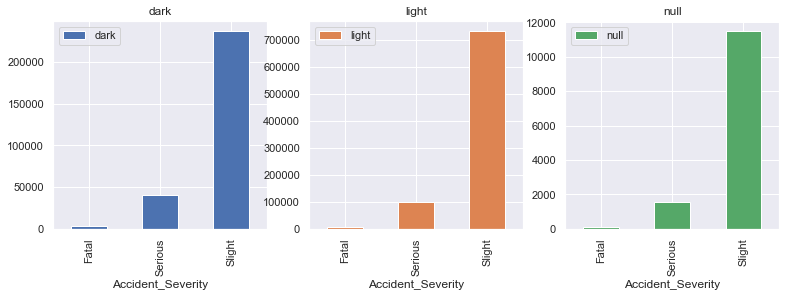

In [24]:
ag = accidents.groupby('Accident_Severity').Light_Conditions.value_counts().sort_index()
# ag.unstack()
ag.unstack().plot(kind='bar', subplots=True, layout=(3,3),figsize= (13,13))
plt.show()

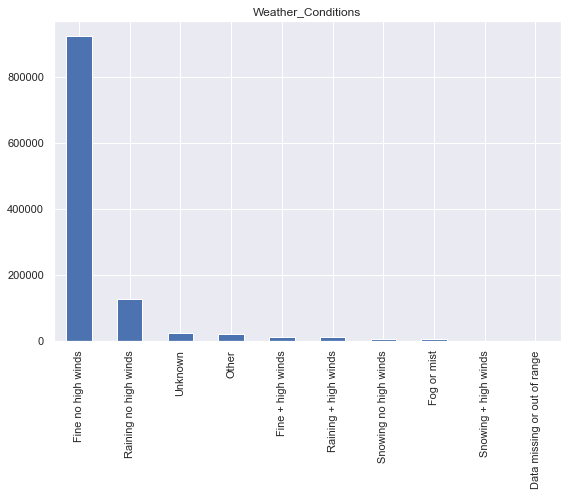

In [25]:
accidents['Weather_Conditions'].value_counts().plot(kind='bar', subplots=True, layout=(3,2),figsize= (20,20))
plt.show()

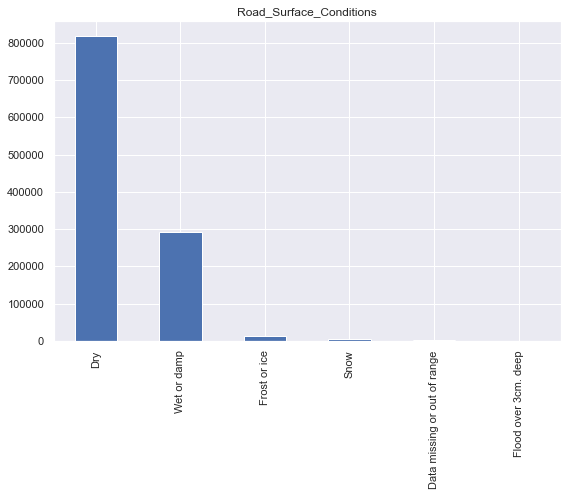

In [26]:
accidents['Road_Surface_Conditions'].value_counts().plot(kind='bar', subplots=True, layout=(3,2),figsize= (20,20))
plt.show()

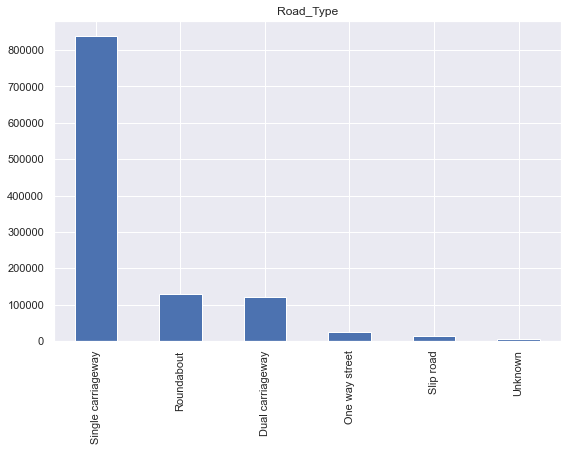

In [27]:
accidents['Road_Type'].value_counts().plot(kind='bar', subplots=True, layout=(3,2),figsize= (20,20))
plt.show()

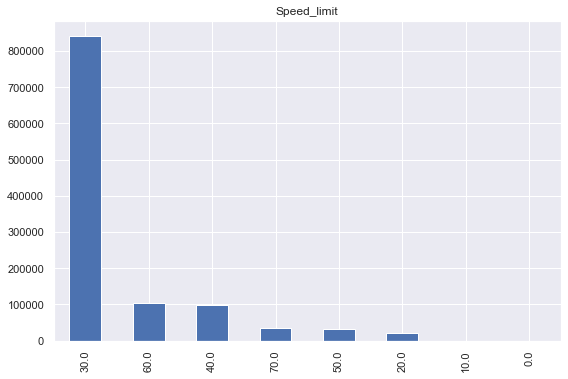

In [28]:
accidents['Speed_limit'].value_counts().plot(kind='bar', subplots=True, layout=(3,2),figsize= (20,20))
plt.show()

## Normalizer

In [29]:
from sklearn.preprocessing import Normalizer
array = accidents['Speed_limit'].values

array.reshape(-1, 1)
Data_normalizer = Normalizer(norm='l1').fit(array.reshape(-1, 1))
Data_normalized = Data_normalizer.transform(array.reshape(-1, 1))

In [30]:
severity1 = accidents[accidents['Accident_Severity'] == 'Fatal']
severity2 = accidents[accidents['Accident_Severity'] == 'Serious']
severity3 = accidents[accidents['Accident_Severity'] == 'Slight']



In [31]:

print(min(severity1['Longitude']))
print(max(severity1['Longitude']))
print(min(severity1['Latitude']))
print(max(severity1['Latitude']))

-5.563816
1.7368919999999999
50.075484
55.782135


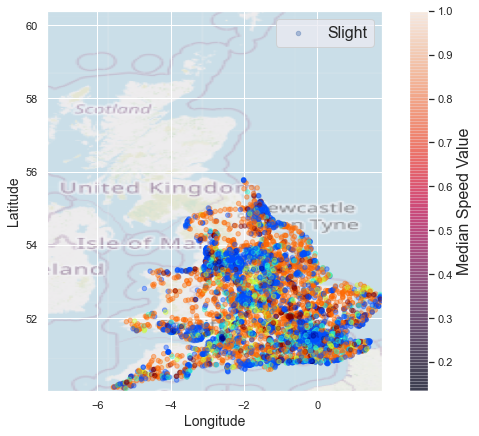

In [32]:
import numpy as np
import matplotlib.image as mpimg

california_img=mpimg.imread('/Users/macosx/Downloads/map (1).png')
ax = severity1.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7),label='Slight',
            c='Speed_limit',
                      
                      cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-7.378267, 1.755184, 50.004371, 60.391536], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

#prices = housing["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median Speed Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

##  LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

accidents['Year']= LabelEncoder().fit_transform(accidents['Year'].astype(str))

accidents['Weather_Conditions']= LabelEncoder().fit_transform(accidents['Weather_Conditions'].astype(str))
accidents['Road_Surface_Conditions']= LabelEncoder().fit_transform(accidents['Road_Surface_Conditions'].astype(str))
accidents['Road_Type']= LabelEncoder().fit_transform(accidents['Road_Type'].astype(str))
accidents['Hour']= LabelEncoder().fit_transform(accidents['Hour'].astype(str))
accidents['Day_of_Week']= LabelEncoder().fit_transform(accidents['Day_of_Week'].astype(str))
accidents['Junction_Control']= LabelEncoder().fit_transform(accidents['Junction_Control'].astype(str))
accidents['Light_Conditions']= LabelEncoder().fit_transform(accidents['Light_Conditions'].astype(str))
accidents['Junction_Detail']= LabelEncoder().fit_transform(accidents['Junction_Detail'].astype(str))
accidents['Urban_or_Rural_Area']= LabelEncoder().fit_transform(accidents['Urban_or_Rural_Area'].astype(str))



In [34]:
accidents.shape

(1129974, 35)

In [35]:
accidents.head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Hour
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,6,1.0,...,1,0,None,30.0,2020-12-26 17:36:00,1,2,0,No,9
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,4,1.0,...,1,3,None,30.0,2020-12-26 20:40:00,1,2,0,No,13
8,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,2,1.0,...,1,3,None,30.0,2020-12-26 22:43:00,1,2,0,No,15


## Get_dummies

In [36]:
accidents=pd.get_dummies(accidents, columns=['Accident_Severity'])


In [37]:
accidents.head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Hour,Accident_Severity_Fatal,Accident_Severity_Serious,Accident_Severity_Slight
1,200501BS00002,B,450.0,C,0.0,None,2005-01-05,6,1.0,1,...,30.0,2020-12-26 17:36:00,1,2,0,No,9,0,0,1
6,200501BS00007,C,0.0,Unclassified,0.0,None,2005-01-13,4,1.0,3,...,30.0,2020-12-26 20:40:00,1,2,0,No,13,0,0,1
8,200501BS00010,A,3212.0,B,304.0,None,2005-01-15,2,1.0,1,...,30.0,2020-12-26 22:43:00,1,2,0,No,15,0,0,1


In [38]:
accidents.Urban_or_Rural_Area.value_counts()

1    858025
0    271949
Name: Urban_or_Rural_Area, dtype: int64

In [39]:
accidents1=accidents[['Accident_Severity_Fatal','Accident_Severity_Serious','Accident_Severity_Slight','1st_Road_Class', '1st_Road_Number',  'Date',
       'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Latitude',
       'Light_Conditions', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year','Hour']]

In [40]:
accidents1=pd.get_dummies(accidents1, columns=['Urban_or_Rural_Area'])

In [41]:
correlations = accidents1.corr(method='pearson')
correlations

,Accident_Severity_Fatal,Accident_Severity_Serious,Accident_Severity_Slight,1st_Road_Number,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Weather_Conditions,Year,Hour,Urban_or_Rural_Area_0,Urban_or_Rural_Area_1
Accident_Severity_Fatal,1.000000,-0.032680,-0.223751,0.000752,-0.004774,0.007524,0.005797,0.006539,-0.022004,-0.008600,0.041251,-0.020351,-0.001696,-0.007939,0.049868,-0.011490,-0.008152,-0.003441,0.038990,-0.038990
Accident_Severity_Serious,-0.032680,1.000000,-0.966814,0.001268,-0.004479,0.020924,0.014322,0.005508,-0.033450,-0.002160,0.022506,-0.090236,-0.011956,0.017371,0.027801,-0.024834,0.034075,-0.001964,0.032518,-0.032518
Accident_Severity_Slight,-0.223751,-0.966814,1.000000,-0.001429,0.005589,-0.022327,-0.015448,-0.007043,0.038244,0.004304,-0.032492,0.093197,0.012092,-0.014910,-0.039858,0.027155,-0.031145,0.002795,-0.041677,0.041677
1st_Road_Number,0.000752,0.001268,-0.001429,1.000000,-0.001016,-0.024833,-0.014607,0.096331,-0.003236,-0.135789,0.019531,0.014865,0.022783,0.004043,-0.030949,0.014494,-0.016016,-0.001424,-0.004260,0.004260
Day_of_Week,-0.004774,-0.004479,0.005589,-0.001016,1.000000,0.005652,0.004587,-0.005991,0.024791,0.002881,-0.018031,0.008515,-0.000693,0.000961,-0.000767,-0.005597,0.002982,0.038921,0.000153,-0.000153
Junction_Control,0.007524,0.020924,-0.022327,-0.024833,0.005652,1.000000,0.328713,0.006694,0.051547,-0.027404,-0.016697,0.012700,0.020382,0.176559,0.090473,0.003287,-0.012638,0.005575,0.149364,-0.149364
Junction_Detail,0.005797,0.014322,-0.015448,-0.014607,0.004587,0.328713,1.000000,-0.022533,0.032212,0.022336,-0.043305,-0.028264,-0.004999,0.074307,0.042672,-0.007858,0.004497,0.003970,0.066420,-0.066420
Latitude,0.006539,0.005508,-0.007043,0.096331,-0.005991,0.006694,-0.022533,1.000000,0.010378,-0.302511,0.073615,0.011270,0.055396,-0.014730,0.023397,0.023292,-0.056016,-0.031895,0.027819,-0.027819
Light_Conditions,-0.022004,-0.033450,0.038244,-0.003236,0.024791,0.051547,0.032212,0.010378,1.000000,-0.023069,-0.029274,0.060415,-0.193241,0.026672,0.026364,-0.080142,0.006758,-0.089627,0.051310,-0.051310
Longitude,-0.008600,-0.002160,0.004304,-0.135789,0.002881,-0.027404,0.022336,-0.302511,-0.023069,1.000000,-0.063892,-0.028145,-0.060405,0.011686,-0.051064,-0.039101,0.058668,0.029441,-0.089748,0.089748


array([[<AxesSubplot:title={'center':'Accident_Severity_Fatal'}>,
        <AxesSubplot:title={'center':'Accident_Severity_Serious'}>,
        <AxesSubplot:title={'center':'Accident_Severity_Slight'}>,
        <AxesSubplot:title={'center':'1st_Road_Number'}>],
       [<AxesSubplot:title={'center':'Day_of_Week'}>,
        <AxesSubplot:title={'center':'Junction_Control'}>,
        <AxesSubplot:title={'center':'Junction_Detail'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Light_Conditions'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Number_of_Casualties'}>,
        <AxesSubplot:title={'center':'Number_of_Vehicles'}>],
       [<AxesSubplot:title={'center':'Road_Surface_Conditions'}>,
        <AxesSubplot:title={'center':'Road_Type'}>,
        <AxesSubplot:title={'center':'Speed_limit'}>,
        <AxesSubplot:title={'center':'Weather_Conditions'}>],
       [<AxesSubplot:title={'center':'Year'}>,


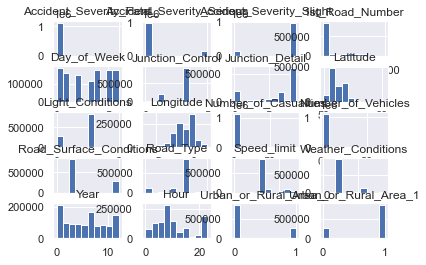

In [42]:
accidents1.hist()

## MinMaxScaler

In [43]:


from sklearn.preprocessing import MinMaxScaler
accidents = MinMaxScaler(feature_range=(0,1))
accidents = accidents.fit_transform(accidents1[['Road_Type','Speed_limit']])


In [44]:
accidents1.head(3)

,Accident_Severity_Fatal,Accident_Severity_Serious,Accident_Severity_Slight,1st_Road_Class,1st_Road_Number,Date,Day_of_Week,Junction_Control,Junction_Detail,Latitude,...,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Year,Hour,Urban_or_Rural_Area_0,Urban_or_Rural_Area_1
1,0,0,1,B,450.0,2005-01-05,6,1,0,51.520075,...,1,1,0,30.0,2020-12-26 17:36:00,2,0,9,0,1
6,0,0,1,C,0.0,2005-01-13,4,3,9,51.512695,...,2,1,3,30.0,2020-12-26 20:40:00,2,0,13,0,1
8,0,0,1,A,3212.0,2005-01-15,2,1,0,51.483420,...,2,1,3,30.0,2020-12-26 22:43:00,2,0,15,0,1


In [45]:
accidents1.drop(columns=['1st_Road_Class'])

,Accident_Severity_Fatal,Accident_Severity_Serious,Accident_Severity_Slight,1st_Road_Number,Date,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Year,Hour,Urban_or_Rural_Area_0,Urban_or_Rural_Area_1
1,0,0,1,450.0,2005-01-05,6,1,0,51.520075,0,...,1,1,0,30.0,2020-12-26 17:36:00,2,0,9,0,1
6,0,0,1,0.0,2005-01-13,4,3,9,51.512695,0,...,2,1,3,30.0,2020-12-26 20:40:00,2,0,13,0,1
8,0,0,1,3212.0,2005-01-15,2,1,0,51.483420,0,...,2,1,3,30.0,2020-12-26 22:43:00,2,0,15,0,1
9,0,0,1,450.0,2005-01-15,2,3,9,51.512443,1,...,2,1,3,30.0,2020-12-26 16:00:00,2,0,8,0,1
10,0,0,1,4.0,2005-01-16,3,1,0,51.494902,0,...,1,1,3,30.0,2020-12-26 00:42:00,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040128,0,0,1,483.0,2017-03-08,6,3,9,52.746141,1,...,3,1,3,60.0,2020-12-26 15:20:00,2,12,7,1,0
2040130,0,0,1,0.0,2017-03-15,6,3,9,52.516585,1,...,1,1,3,30.0,2020-12-26 13:45:00,2,12,5,0,1
2040138,0,1,0,4358.0,2017-03-20,1,3,6,52.225826,1,...,2,5,3,60.0,2020-12-26 11:45:00,6,12,3,1,0
2040140,0,0,1,0.0,2017-02-03,0,3,9,51.861039,1,...,3,4,3,30.0,2020-12-26 06:36:00,2,12,20,1,0


In [46]:
accidents1.shape

(1129974, 23)

In [47]:
accidents1.columns

Index(['Accident_Severity_Fatal', 'Accident_Severity_Serious',
       'Accident_Severity_Slight', '1st_Road_Class', '1st_Road_Number', 'Date',
       'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Latitude',
       'Light_Conditions', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Time', 'Weather_Conditions', 'Year', 'Hour',
       'Urban_or_Rural_Area_0', 'Urban_or_Rural_Area_1'],
      dtype='object')

In [48]:
df=accidents1[['Accident_Severity_Fatal', 'Accident_Severity_Serious',
       'Accident_Severity_Slight', '1st_Road_Number',
       'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Light_Conditions',  'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Weather_Conditions', 'Year', 'Hour',
       'Urban_or_Rural_Area_0', 'Urban_or_Rural_Area_1']]

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
array = accidents1.values

X = df
Y = accidents1['Accident_Severity_Fatal']

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)

In [50]:
set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(X)
print ("\nFeatured data:\n", featured_data[0:4])

[1.12e+06 1.06e+03 7.42e+03 2.03e+03 3.71e+01 1.56e+01 6.33e+01 1.46e+02
 8.42e+02 8.96e+01 4.84e+00 2.74e+01 1.00e+04 1.50e+02 1.89e+02 5.40e+01
 1.30e+03 4.13e+02]

Featured data:
 [[0.00e+00 1.00e+00 4.50e+02 3.00e+01]
 [0.00e+00 1.00e+00 0.00e+00 3.00e+01]
 [0.00e+00 1.00e+00 3.21e+03 3.00e+01]
 [0.00e+00 1.00e+00 4.50e+02 3.00e+01]]


## Correlation

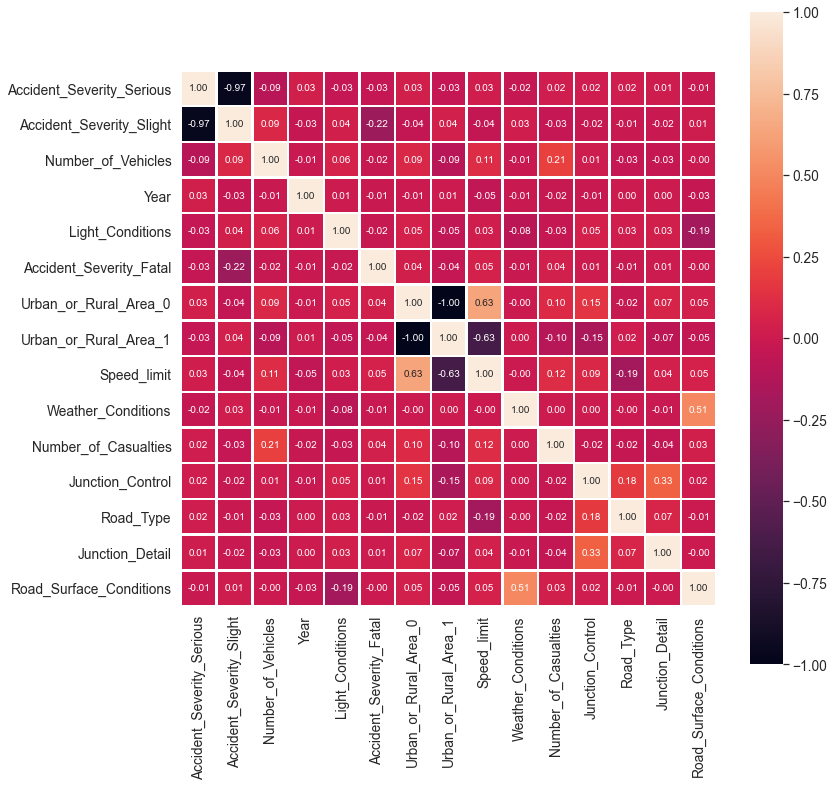

Final list of selected features:
['Accident_Severity_Serious', 'Accident_Severity_Slight', 'Number_of_Vehicles', 'Year', 'Light_Conditions', 'Accident_Severity_Fatal', 'Urban_or_Rural_Area_0', 'Urban_or_Rural_Area_1', 'Speed_limit', 'Weather_Conditions', 'Number_of_Casualties', 'Junction_Control', 'Road_Type', 'Junction_Detail', 'Road_Surface_Conditions']


In [51]:
import numpy as np
import seaborn as sns
target = 'Accident_Severity_Serious'
#plot heatmap
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(12, 12))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    #plt.savefig('/Users/pprusty05/google_drive/Data_Mining/Project/plots/correlation.pdf')
    plt.show()
    
    

#set the threshold for feature selection
corr_theshold=.01

#find the correlation values
corr = accidents1.corr()
corr_abs = corr.abs()

num_cols = len(accidents1)
#sort the correlation values in descending order
sort_corr = corr_abs.nlargest(num_cols, target)[target]
#print(sort_corr)

#filter the features with above correlation values
cols_abv_corr_limit = list(sort_corr[sort_corr.values > corr_theshold].index)
cols_bel_corr_limit = list(sort_corr[sort_corr.values <= corr_theshold].index)
selected_feats=cols_abv_corr_limit
nr_feats = len(cols_abv_corr_limit)

#plot the heatmap with selected features
plot_corr_matrix(accidents1, nr_feats, target)

#drop the features from df_train with correaltion value below threshold
#for df in [df_dummies]:
    #df.drop(cols_bel_corr_limit, inplace=True, axis=1)

print("Final list of selected features:")
print(selected_feats)

# Machine learning Models

### Train-Test

In [52]:
#train_under = pd.concat([df_slight_under, df_serious_under, df_fatal], axis=0)

df1 = accidents1[['Road_Surface_Conditions','Road_Type','Hour','Day_of_Week','Light_Conditions','Junction_Detail','Weather_Conditions','Number_of_Vehicles']]
#df1 = accidents1[['Weather_Conditions']]

In [53]:
X = df1
y = accidents1['Accident_Severity_Slight']

In [54]:
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## Logistic Regression

In [56]:
digreg = linear_model.LogisticRegression()

In [57]:
digreg.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = digreg.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result0 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result0)
result01 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result01)
result02 = accuracy_score(y_test,y_pred)
print("Accuracy:",result02)

Confusion Matrix:
[[     0  59058]
 [     0 392932]]


/Users/macosx/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     59058
           1       0.87      1.00      0.93    392932

    accuracy                           0.87    451990
   macro avg       0.43      0.50      0.47    451990
weighted avg       0.76      0.87      0.81    451990

Accuracy: 0.8693378172083454


In [60]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 86.93378172083453


In [61]:
print("Test Error = %g " % (1.0 - metrics.accuracy_score(y_test, y_pred)))

Test Error = 0.130662 


In [62]:
from sklearn import linear_model
import sklearn.metrics as sm

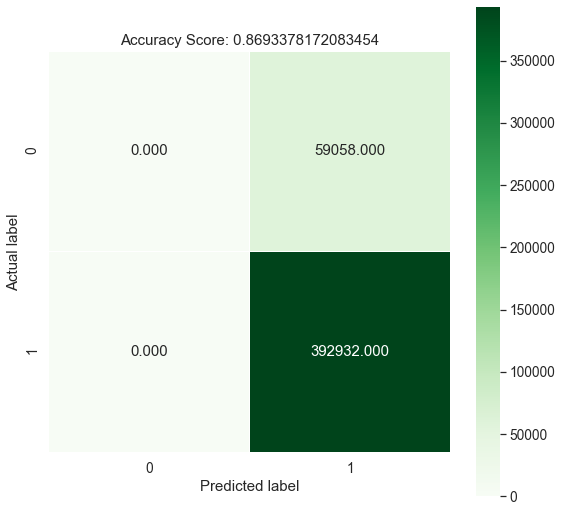

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(result0, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(result02)
plt.title(all_sample_title, size = 15);

In [64]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 0.13
Mean squared error(MSE) = 0.13
Median absolute error = 0.0
Explain variance score = -65024.0
R2 score = -0.15


## Décision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [67]:
y_pred1 = clf.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result00 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(result00)
result001 = classification_report(y_test, y_pred1)
print("Classification Report:",)
print (result001)
result002 = accuracy_score(y_test,y_pred1)
print("Accuracy:",result002)

Confusion Matrix:
[[  1625  57433]
 [  8360 384572]]
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.03      0.05     59058
           1       0.87      0.98      0.92    392932

    accuracy                           0.85    451990
   macro avg       0.52      0.50      0.48    451990
weighted avg       0.78      0.85      0.81    451990

Accuracy: 0.8544370450673687


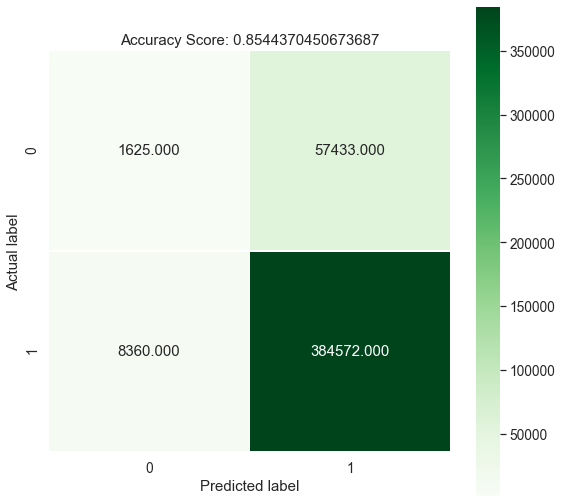

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(result00, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(result002)
plt.title(all_sample_title, size = 15);

In [70]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred1), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred1), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred1), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred1), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred1), 2))

Regressor model performance:
Mean absolute error(MAE) = 4.84
Mean squared error(MSE) = 0.15
Median absolute error = 0.0
Explain variance score = -63485.94
R2 score = -0.28


## RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [73]:
y_pred2 = classifier.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result000 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(result000)
result0001 = classification_report(y_test, y_pred2)
print("Classification Report:",)
print (result0001)
result0002 = accuracy_score(y_test,y_pred2)
print("Accuracy:",result0002)

Confusion Matrix:
[[   847  58211]
 [  3671 389261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.01      0.03     59058
           1       0.87      0.99      0.93    392932

    accuracy                           0.86    451990
   macro avg       0.53      0.50      0.48    451990
weighted avg       0.78      0.86      0.81    451990

Accuracy: 0.863089891369278


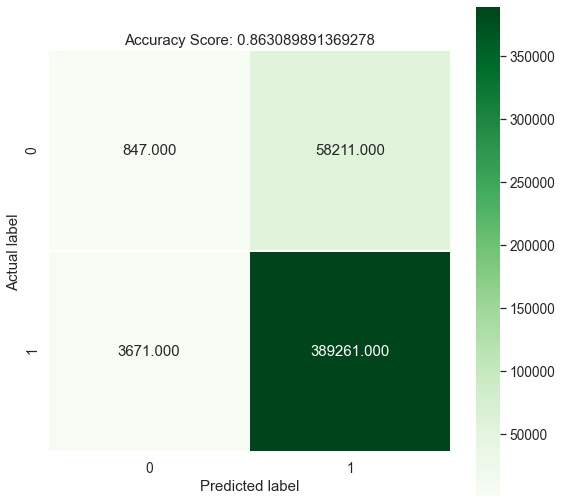

In [75]:
plt.figure(figsize=(9,9))
sns.heatmap(result000, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(result0002)
plt.title(all_sample_title, size = 15);

In [76]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred2), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred2), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred2), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred2), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred2), 2))

Regressor model performance:
Mean absolute error(MAE) = 2.2
Mean squared error(MSE) = 0.14
Median absolute error = 0.0
Explain variance score = -64224.95
R2 score = -0.21


## LinearRegression

In [77]:

#df1 = accidents1[['Road_Surface_Conditions','Road_Type','Hour','Day_of_Week','Light_Conditions','Junction_Detail','Weather_Conditions','Number_of_Vehicles']]
df11 = accidents1[['Road_Type']]

X1 = df11
y = accidents1['Accident_Severity_Slight']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=1)

In [79]:
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [80]:
reg_linear= linear_model.LinearRegression()

In [81]:
reg_linear.fit(X_train, y_train)

LinearRegression()

In [82]:
y_test_pred = reg_linear.predict(X_test)

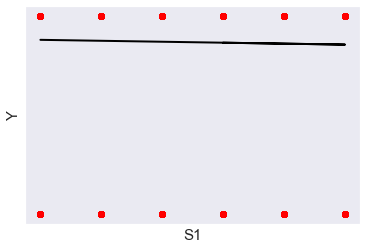

In [83]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_test_pred, color='black', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.xlabel("S1")
plt.ylabel("Y")

plt.show()

In [85]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))


Regressor model performance:
Mean absolute error(MAE) = 0.23
Mean squared error(MSE) = 0.11
Median absolute error = 0.13
Explain variance score = 0.0
R2 score = 0.0


# SVM

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

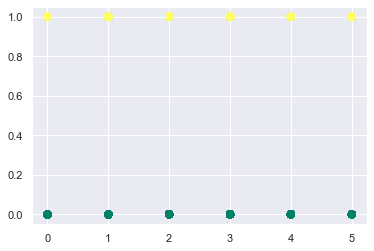

In [89]:
plt.scatter(X1,y, c=y, s=50, cmap='summer');

In [ ]:
from sklearn.svm import SVC

modele2 = SVC(kernel='linear')
#modele2 = SVC(kernel='rbf')
#regression SVR
modele2.fit(X_train, y_train)

In [ ]:
y_pred3 = modele2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result00000 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(result00000)
result000001 = classification_report(y_test, y_pred3)
print("Classification Report:",)
print (result000001)
result000002 = accuracy_score(y_test,y_pred3)
print("Accuracy:",result000002)

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(result00000, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(result000002)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
###############

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

In [ ]:
y_pred3 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result00000 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(result00000)
result000001 = classification_report(y_test, y_pred3)
print("Classification Report:",)
print (result1)
result000002 = accuracy_score(y_test,y_pred3)
print("Accuracy:",result000002)

In [ ]:



estimators = []

estimators.append(('LogisticRegression', result2))

estimators.append(('Decisiontree', result02))

estimators.append(('Random forest', result002))

estimators.append(('Linear regression ', result0002))
estimators.append(('SVM', result00002))
estimators.append(('KNN', result000002))



print("Cross Validation : " , estimators)


## Cross VAlidation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [ ]:
modele01 = cross_val_score(digreg, X, y, cv=kfold)
#print(modele01.mean())
modele02 = cross_val_score(y_pred2, X, y, cv=kfold)
#print(modele02.mean())
modele03 = cross_val_score(y_pred1, X, y, cv=kfold)
#print(modele03.mean())

In [ ]:
estimators = []
modele1 = LogisticRegression()
estimators.append(('logistic regression ', modele01.mean()))
modele2 = RandomForestClassifier
estimators.append(('RandomForestClassifier', y_pred2.mean()))
modele3 = DecisionTreeClassifier()
estimators.append(('decision tree', y_pred1.mean()))

In [ ]:

print("Cross Validation : " , estimators)


# GridSearchCV

In [ ]:
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

grid={} 
clf1 = GridSearchCV(modele1,cv=10, param_grid=grid, return_train_score=True)
clf1.fit(X_train,y_train)

In [ ]:
print(clf1.best_score_)

In [ ]:
#n_splits = 10
parameters = {}
clf2 = GridSearchCV(modele2, parameters)
clf2.fit(X_train,y_train)

In [ ]:
print(clf2.best_score_)


In [ ]:
#grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
grid={}
clf3 = GridSearchCV(modele3,grid,cv=10)
clf3.fit(X_train,y_train)


In [ ]:
print(clf3.best_score_)


In [ ]:
estimators_grid = []
modele1 = GaussianNB()
estimators_grid.append(('naivebayes', clf1.best_score_))
modele2 = SVC()
estimators_grid.append(('svm', clf2.best_score_))
modele3 = LogisticRegression()
estimators_grid.append(('logistic', clf3.best_score_))

In [ ]:
print("GridsearchCV : " , estimators)

## Ridge

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
models = []
models.append("Logistic Regression Test Accuracy:",score1))
models.append("Random Forest Test Accuracy:",score2) 
models.append("Decision Tree Test Accuracy:",score3)) 